In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
col_names = ['Country of Origin', 'Famous Actor', 'Genre', 'Success']
movie = pd.read_csv('E:\Rizwan study\ML Task\Movies.csv',header=None, names=col_names)
movie


,Country of Origin,Famous Actor,Genre,Success
Film,Country of Origin,Famous Actor,Genre,Success
1,USA,Yes,Science Fiction,True
2,USA,No,Comedy,False
3,USA,Yes,Comedy,True
4,India,No,Comedy,True
5,Inida,Yes,Science Fiction,False
6,India,Yes,Romance,False
7,Germany,Yes,Comedy,False
8,Germany,No,Science Fiction,False
9,India,Yes,Comedy,True


In [3]:
movie.head()

,Country of Origin,Famous Actor,Genre,Success
Film,Country of Origin,Famous Actor,Genre,Success
1,USA,Yes,Science Fiction,True
2,USA,No,Comedy,False
3,USA,Yes,Comedy,True
4,India,No,Comedy,True


In [4]:
movie.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Film to 10
Data columns (total 4 columns):
Country of Origin    11 non-null object
Famous Actor         11 non-null object
Genre                11 non-null object
Success              11 non-null object
dtypes: object(4)
memory usage: 440.0+ bytes


In [5]:
df2 = movie[["Country of Origin","Famous Actor","Genre","Success"]]


In [6]:
le = LabelEncoder()

In [7]:

le.fit_transform(df2["Country of Origin"])


array([0, 4, 4, 4, 2, 3, 2, 1, 1, 2, 4])

In [8]:
le.fit_transform(df2["Famous Actor"])

array([0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2])

In [9]:
le.fit_transform(df2["Genre"])

array([1, 3, 0, 0, 0, 3, 2, 0, 3, 0, 0])

In [10]:
le.fit_transform(df2["Success"])

array([1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2])

In [11]:
df2["Country of Origin"] = le.fit_transform(df2["Country of Origin"])
df2

,Country of Origin,Famous Actor,Genre,Success
Film,0,Famous Actor,Genre,Success
1,4,Yes,Science Fiction,True
2,4,No,Comedy,False
3,4,Yes,Comedy,True
4,2,No,Comedy,True
5,3,Yes,Science Fiction,False
6,2,Yes,Romance,False
7,1,Yes,Comedy,False
8,1,No,Science Fiction,False
9,2,Yes,Comedy,True


In [12]:
df2["Famous Actor"] = le.fit_transform(df2["Famous Actor"])
df2

,Country of Origin,Famous Actor,Genre,Success
Film,0,0,Genre,Success
1,4,2,Science Fiction,True
2,4,1,Comedy,False
3,4,2,Comedy,True
4,2,1,Comedy,True
5,3,2,Science Fiction,False
6,2,2,Romance,False
7,1,2,Comedy,False
8,1,1,Science Fiction,False
9,2,2,Comedy,True


In [13]:
df2["Genre"] = le.fit_transform(df2["Genre"])
df2

,Country of Origin,Famous Actor,Genre,Success
Film,0,0,1,Success
1,4,2,3,True
2,4,1,0,False
3,4,2,0,True
4,2,1,0,True
5,3,2,3,False
6,2,2,2,False
7,1,2,0,False
8,1,1,3,False
9,2,2,0,True


In [14]:
df2["Success"] = le.fit_transform(df2["Success"])
df2

,Country of Origin,Famous Actor,Genre,Success
Film,0,0,1,1
1,4,2,3,2
2,4,1,0,0
3,4,2,0,2
4,2,1,0,2
5,3,2,3,0
6,2,2,2,0
7,1,2,0,0
8,1,1,3,0
9,2,2,0,2


In [15]:
df2

,Country of Origin,Famous Actor,Genre,Success
Film,0,0,1,1
1,4,2,3,2
2,4,1,0,0
3,4,2,0,2
4,2,1,0,2
5,3,2,3,0
6,2,2,2,0
7,1,2,0,0
8,1,1,3,0
9,2,2,0,2


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Film to 10
Data columns (total 4 columns):
Country of Origin    11 non-null int32
Famous Actor         11 non-null int32
Genre                11 non-null int32
Success              11 non-null int32
dtypes: int32(4)
memory usage: 264.0+ bytes


In [17]:
movie["Country of Origin"].value_counts()

USA                  4
India                3
Germany              2
Country of Origin    1
Inida                1
Name: Country of Origin, dtype: int64

In [18]:
movie["Famous Actor"].value_counts()

Yes             7
No              3
Famous Actor    1
Name: Famous Actor, dtype: int64

In [19]:
movie["Genre"].value_counts()

Comedy             6
Science Fiction    3
Romance            1
Genre              1
Name: Genre, dtype: int64

In [20]:
movie["Success"].value_counts()

False      5
True       5
Success    1
Name: Success, dtype: int64

In [62]:
X = df2.drop(['Country of Origin'], axis=1)

y = df2['Country of Origin']

In [63]:
#split dataset in features and target variable
feature_cols = ['Country of Origin', 'Famous Actor', 'Genre','Success']
target=['Country of Origin','Genre']
X = df2[feature_cols] # Features
y = df2[target] # Target variable


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Decision Tree Classifier with criterion gini index

In [65]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [66]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [67]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: multiclass-multioutput is not supported

In [48]:
# instantiate the DecisionTreeClassifier model with criterion gini entropy

clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [49]:
y_pred = clf.predict(X_test)

# from sklearn.metrics import accuracy_score



In [28]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

ValueError: multiclass-multioutput is not supported

# Compare the train-set and test-set accuracy

In [40]:
y_pred = clf.predict(X_train)

y_pred

array([[4, 2],
       [2, 0],
       [0, 1],
       [1, 0],
       [4, 2],
       [1, 0],
       [3, 0]])

In [30]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred)))

ValueError: multiclass-multioutput is not supported

# Check for overfitting and underfitting

In [41]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))


ValueError: multiclass-multioutput is not supported

[Text(386.3076923076923, 380.52, 'X[2] <= 2.5\ngini = 0.735\nsamples = 7\nvalue = [[1, 2, 1, 1, 2]\n[2, 1, 1, 3, 0]]'),
 Text(206.03076923076924, 271.8, 'X[2] <= 0.5\ngini = 0.688\nsamples = 4\nvalue = [[1, 1, 1, 0, 1]\n[2, 1, 1, 0, 0]]'),
 Text(103.01538461538462, 163.07999999999998, 'X[0] <= 2.5\ngini = 0.25\nsamples = 2\nvalue = [[0, 1, 0, 0, 1]\n[2, 0, 0, 0, 0]]'),
 Text(51.50769230769231, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [[0, 1, 0, 0, 0]\n[1, 0, 0, 0, 0]]'),
 Text(154.52307692307693, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [[0, 0, 0, 0, 1]\n[1, 0, 0, 0, 0]]'),
 Text(309.04615384615386, 163.07999999999998, 'X[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [[1, 0, 1, 0, 0]\n[0, 1, 1, 0, 0]]'),
 Text(257.53846153846155, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0, 0, 0, 0]\n[0, 1, 0, 0, 0]]'),
 Text(360.55384615384617, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [[0, 0, 1, 0, 0]\n[0, 0, 1, 0, 0]]'),
 Text(566.5846153846154, 2

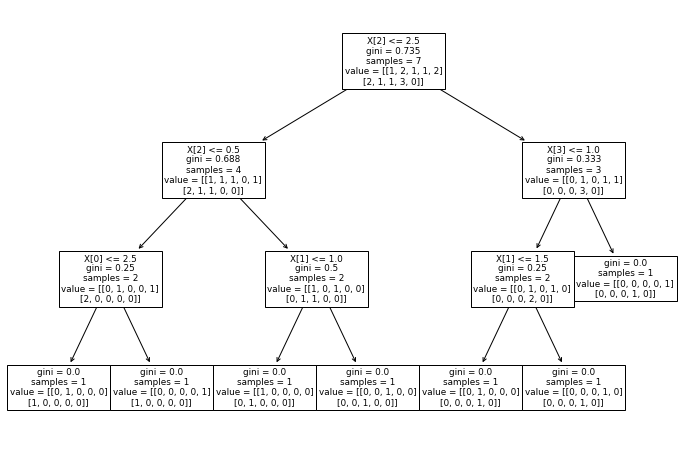

In [50]:
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf.fit(X_train, y_train)) 

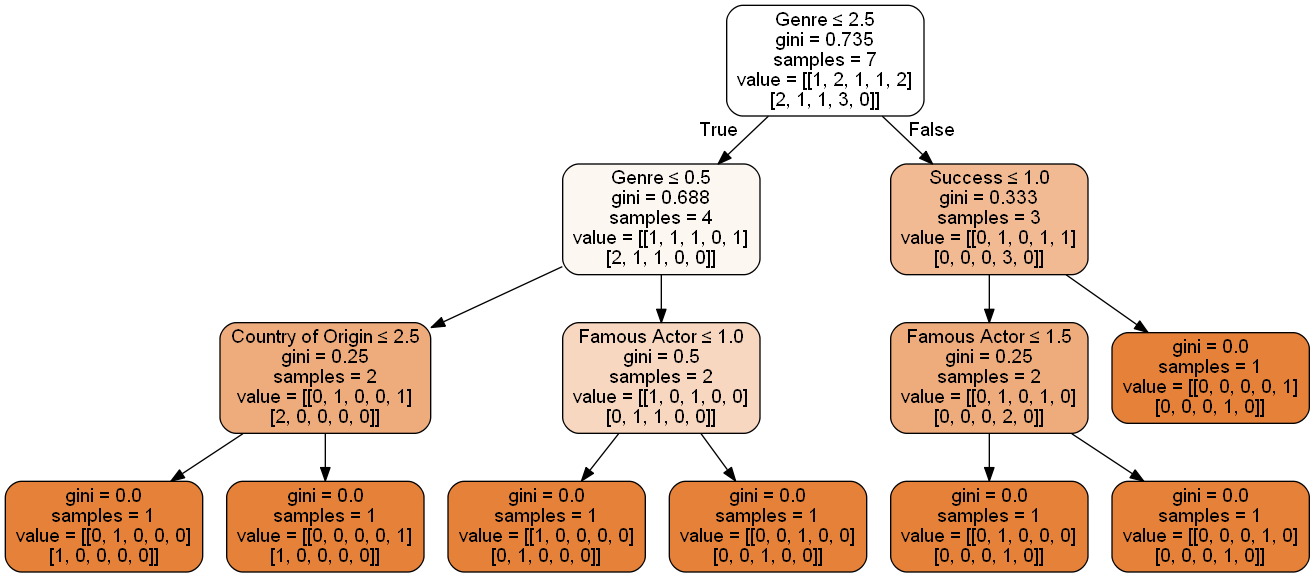

In [51]:
from sklearn.tree import export_graphviz

from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Decision Tree Classifier with criterion entropy

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

In [ ]:
y_pred_en = clf_en.predict(X_test)

# Check accuracy score with criterion entropy

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

In [ ]:
#Compare the train-set and test-set accuracy

In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

In [ ]:
#Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

# Visualize decision-trees

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [ ]:

from sklearn.tree import export_graphviz

from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
dot_data = StringIO()
export_graphviz(clf_en, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))
